Perform Exploratory Data Analysis (EDA) analysis on the following:
    Data Summarization:
        Descriptive Statistics: Calculate the variability for numerical features such as TotalPremium, TotalClaim, etc.
        Data Structure: Review the dtype of each column to confirm if categorical variables, dates, etc. are properly formatted.
    Data Quality Assessment:
        Check for missing values.
    Univariate Analysis:
        Distribution of Variables: Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..
    Bivariate or Multivariate Analysis:
        Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots and correlation matrices.
    Data Comparison
        Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc. 
    Outlier Detection:
        Use box plots to detect outliers in numerical data
    Visualization
        Produce 3 creative and beautiful plots that capture the key insight you gained from your EDA


In [1]:
import os
os.chdir("../")


The data was changed to data/data.csv

In [2]:
import pandas as pd
df = pd.read_csv('data/data.csv')

C:\Users\windows 10\AppData\Local\Temp\ipykernel_5340\1690819300.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/data.csv')


In [ ]:
df['Date_Column'] = pd.to_datetime(df['Date_Column'])

In [ ]:
print(df.columns)

In [ ]:
print(df.head())

In [ ]:
float_col = df.select_dtypes(include=['float64','int64'] )
print(float_col.columns)

Descriptive Statistics: Calculate the variability for numerical features such as TotalPremium, TotalClaim, etc.


In [4]:
#coumns to perform descriptive statistics 
columns_num = ['TotalPremium', 'TotalClaims','SumInsured', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'NumberOfVehiclesInFleet','Age', 'YearsInsured', 'DrivingExperience', 'ClaimFrequency', 'ClaimSeverity']
columns_num = ['TotalPremium', 'TotalClaims','SumInsured', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'NumberOfVehiclesInFleet']


for col in columns_num:
    print("##############",col)
    # Calculate descriptive statistics for TotalPremium and TotalClaim
    descriptive_stats = df[col].describe()

    
    # Print the results
    print("Descriptive Statistics:\n", descriptive_stats)
    


############## TotalPremium
Descriptive Statistics:
 count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64
############## TotalClaims
Descriptive Statistics:
 count    1.000098e+06
mean     6.486119e+01
std      2.384075e+03
min     -1.200241e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.930921e+05
Name: TotalClaims, dtype: float64
############## SumInsured
Descriptive Statistics:
 count    1.000098e+06
mean     6.041727e+05
std      1.508332e+06
min      1.000000e-02
25%      5.000000e+03
50%      7.500000e+03
75%      2.500000e+05
max      1.263620e+07
Name: SumInsured, dtype: float64
############## CalculatedPremiumPerTerm
Descriptive Statistics:
 count    1.000098e+06
mean     1.178757e+02
std      3.997017e+02
min      0.000000e+00
25%      3.224800e+00
50%      8.436900e+00
75%      9.000000

Data Structure: Review the dtype of each column to confirm if categorical variables, dates, etc. are properly formatted.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

we have object, float64, and int64 data types 

In [ ]:
object_cols = df.select_dtypes(include='object')
print(object_cols.columns)

In [ ]:
df.describe()

In [ ]:
for col in object_cols:
    print("######### ", col)
    print(df[col].value_counts())

In [ ]:
num_data_points = len(df)
print("Number of data points:", num_data_points)

Check for missing values.


In [ ]:

total_rows = df.shape[0]

data = {'columns':[],
        'missing_values' : [],
        'missing_values_percentage':[]}
missing = pd.DataFrame(data)

# missing['columns']= df.columns
missing['missing_values'] = df.isnull().sum()
missing['missing_values_percentage'] = (missing['missing_values'] / total_rows) * 100
print(missing)

most of the columns are compleat but some have missing values :
    NumberOfVehiclesInFleet     100.000000
    CrossBorder                  99.930207
    CustomValueEstimate          77.956560
    Converted                    64.183810
    Rebuilt                      64.183810
    WrittenOff                   64.183810
    NewVehicle                   15.327998
    Bank                         14.594670
    AccountType                   4.022806

Distribution of Variables: Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..

In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
categorical_cols = df.select_dtypes(include='object')

print("Numerical columns:", numerical_cols.columns)
print("Categorical columns:", categorical_cols.columns)

Numerical columns: Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet',
       'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium',
       'TotalClaims'],
      dtype='object')
Categorical columns: Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig(f"screenshots/histogram_{col}.png")  
    plt.show()

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig(f"screenshots/bar_chart_{col}.png")  
    plt.show()

Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots and correlation matrices.

In [48]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='ISO8601')


# Sort by TransactionMonth
df = df.sort_values('TransactionMonth')

# Calculate monthly changes
df['TotalPremium_Change'] = df['TotalPremium'].diff()
df['TotalClaims_Change'] = df['TotalClaims'].diff()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a scatter plot with color-coded points by ZipCode
sns.scatterplot(x='TotalPremium_Change', y='TotalClaims_Change', data=df, hue='PostalCode',palette='viridis')

# Set the title and labels
plt.title('Scatter Plot of TotalPremium Changes vs. TotalClaims Changes')
plt.xlabel('TotalPremium Changes')
plt.ylabel('TotalClaims Changes')
plt.savefig('screenshots/scatter_plot_totalpremium_changes_va_totalclaims_changes.png')  


# Show the plot
plt.show()

Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots and correlation matrices.

In [7]:
df = df.head(100)

In [8]:
import requests
import pandas as pd
import geopandas as gpd

# Assuming your DataFrame is named 'df' and the postal code column is 'PostalCode'
def geocode(postal_code):
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={postal_code}"
    response = requests.get(url)
    data = response.json()
    if data['status'] == 'OK':
        location = data['results'][0]['geometry']['location']
        return location['lat'], location['lng']
    else:
        return None, None

# Your API key should be stored securely
api_key = "YOUR_API_KEY"

# Apply geocoding to each postal code and expand the results into separate Latitude and Longitude columns
df[['Latitude', 'Longitude']] = df['PostalCode'].apply(lambda x: pd.Series(geocode(x)))

# Drop rows with None values in Latitude or Longitude
df = df.dropna(subset=['Latitude', 'Longitude'])

# Convert to GeoDataFrame
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))


C:\Users\windows 10\AppData\Local\Temp\ipykernel_5340\2330796307.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Latitude', 'Longitude']] = df['PostalCode'].apply(lambda x: pd.Series(geocode(x)))
C:\Users\windows 10\AppData\Local\Temp\ipykernel_5340\2330796307.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Latitude', 'Longitude']] = df['PostalCode'].apply(lambda x: pd.Series(geocode(x)))


In [74]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your GeoDataFrame with 'geometry' column

# Group data by 'Province' (or 'MainCrestaZone' if you prefer)
grouped_data = df.groupby('Province').agg({
    'CoverType': lambda x: x.value_counts().idxmax(),  # Most common cover type
    'TotalPremium': 'mean',  # Average premium
    'make': lambda x: x.value_counts().idxmax()  # Most common car make
})

# Read shapefile to create GeoDataFrame (adjust path and key name)
gdf = gpd.read_file('path_to_your_shapefile')  # Replace with correct path

# Merge the grouped data with the shapefile GeoDataFrame
merged_data = gdf.merge(grouped_data, left_on='RegionName', right_index=True)

# Create a choropleth map to visualize premium variations
merged_data.plot(column='TotalPremium', cmap='viridis', legend=True)
plt.title('Average Premium by Province')
plt.show()

# Calculate correlation between insurance variables and geographic features
correlation_matrix = df[['TotalPremium', 'Latitude', 'Longitude']].corr()
print(correlation_matrix)


DataSourceError: path_to_your_shapefile: No such file or directory

Data Comparison
    Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc. 


C:\Users\windows 10\AppData\Local\Temp\ipykernel_5340\2491572318.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='TransactionMonth', y='TotalPremium', hue='PostalCode', data=trends, palette='tab10')
C:\Users\windows 10\AppData\Local\Temp\ipykernel_5340\2491572318.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')


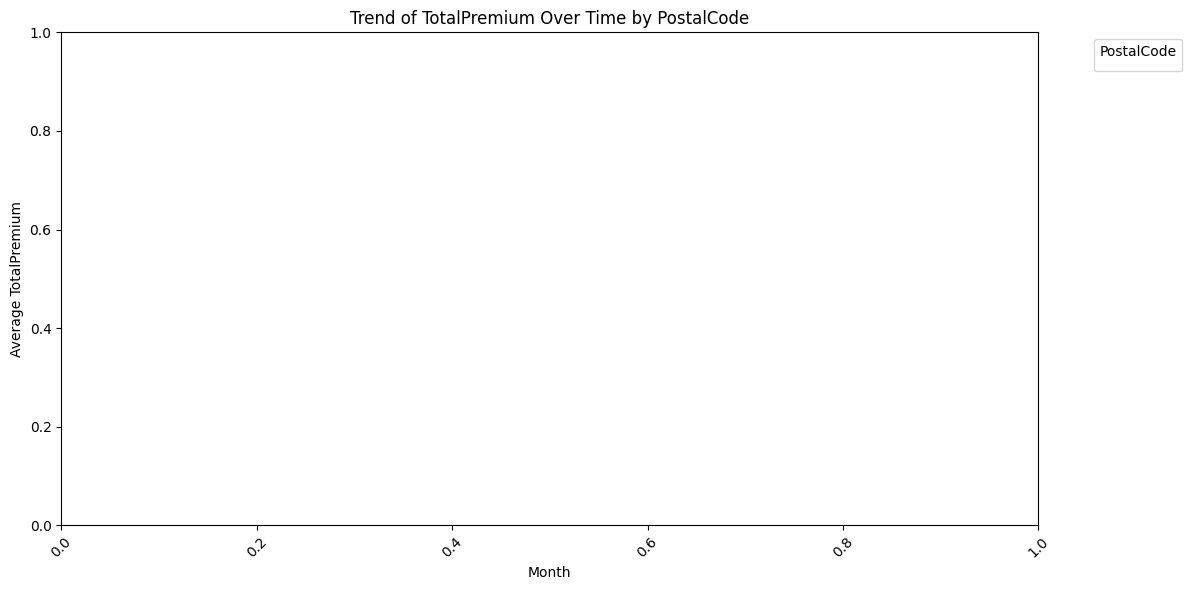

C:\Users\windows 10\AppData\Local\Temp\ipykernel_5340\2491572318.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='TransactionMonth', y='CoverType', hue='PostalCode', data=trends, palette='Set2')
C:\Users\windows 10\AppData\Local\Temp\ipykernel_5340\2491572318.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')


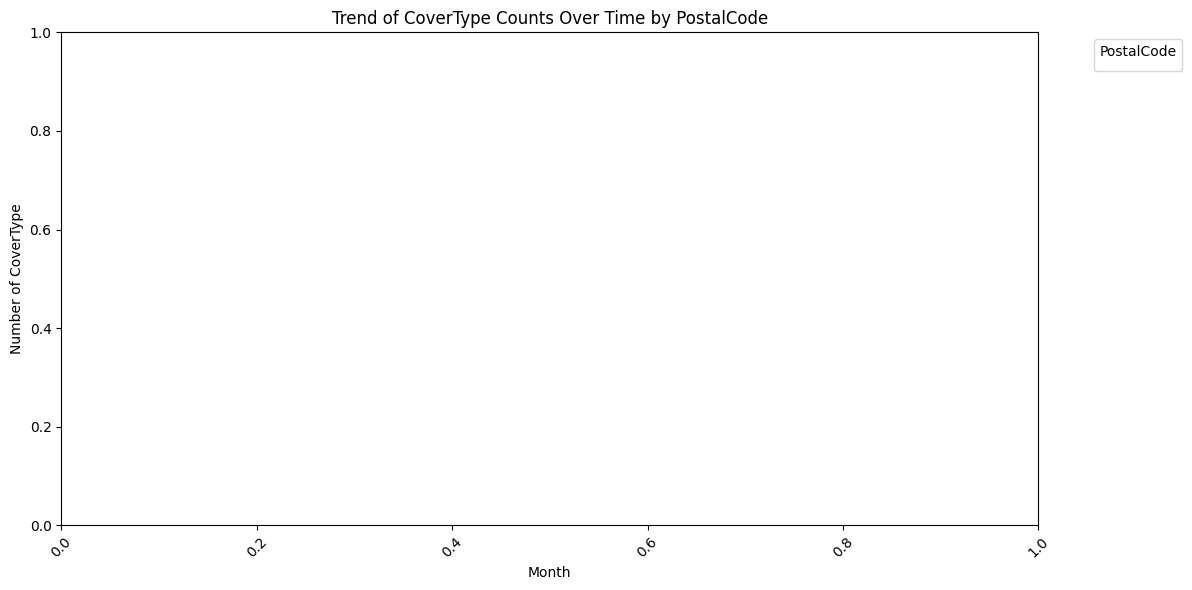

C:\Users\windows 10\AppData\Local\Temp\ipykernel_5340\2491572318.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')


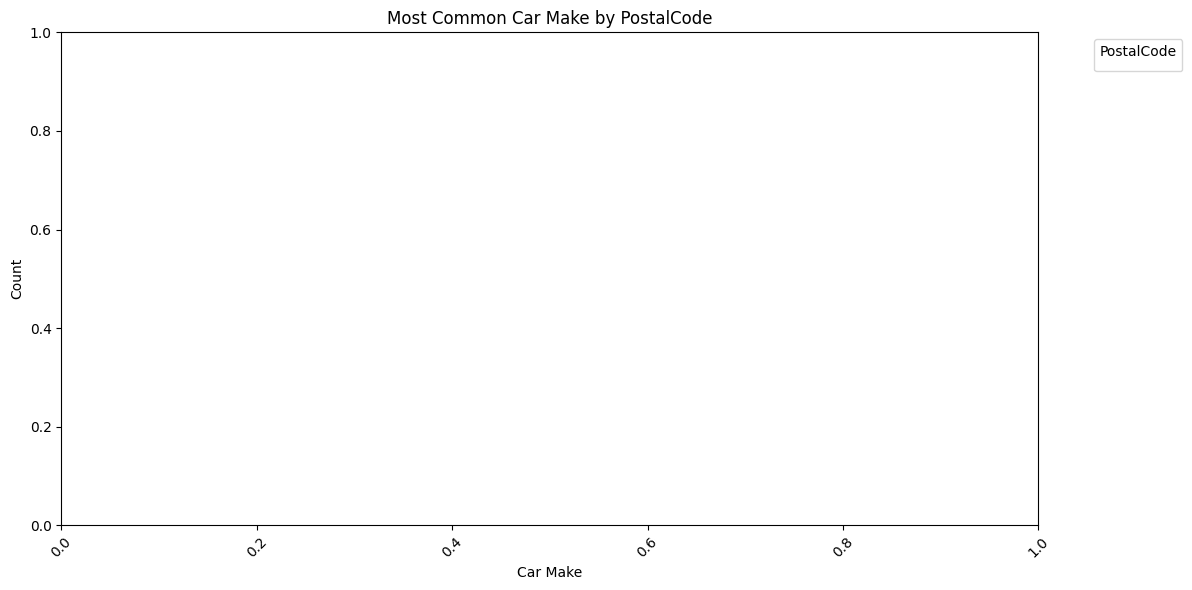

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_geographic_trends(df):
    # Ensure the TransactionMonth column is in datetime format
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m')

    # Sort the data by PostalCode and TransactionMonth
    df = df.sort_values(by=['PostalCode', 'TransactionMonth'])

    # Group by PostalCode and TransactionMonth, and aggregate the data
    trends = df.groupby(['PostalCode', 'TransactionMonth']).agg({
        'CoverType': 'count',            
        'TotalPremium': 'mean',          
        'make': lambda x: x.value_counts().idxmax()  # Most common auto make by postal code and month
    }).reset_index()

    # Calculate the monthly percentage change for the aggregated fields
    trends['TotalPremium_Change'] = trends.groupby('PostalCode')['TotalPremium'].pct_change()

    # Visualize trends over time for TotalPremium, by postal code
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='TransactionMonth', y='TotalPremium', hue='PostalCode', data=trends, palette='tab10')
    plt.title('Trend of TotalPremium Over Time by PostalCode')
    plt.xlabel('Month')
    plt.ylabel('Average TotalPremium')
    plt.xticks(rotation=45)
    plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Visualize trends for CoverType counts over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='TransactionMonth', y='CoverType', hue='PostalCode', data=trends, palette='Set2')
    plt.title('Trend of CoverType Counts Over Time by PostalCode')
    plt.xlabel('Month')
    plt.ylabel('Number of CoverType')
    plt.xticks(rotation=45)
    plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Visualize the most common car make by postal code
    plt.figure(figsize=(12, 6))
    sns.countplot(x='make', hue='PostalCode', data=trends, palette='coolwarm')
    plt.title('Most Common Car Make by PostalCode')
    plt.xticks(rotation=45)
    plt.xlabel('Car Make')
    plt.ylabel('Count')
    plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
analyze_geographic_trends(df)


Outlier Detection:
    Use box plots to detect outliers in numerical data

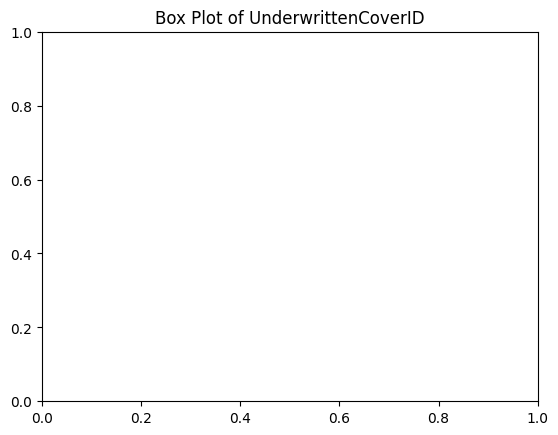

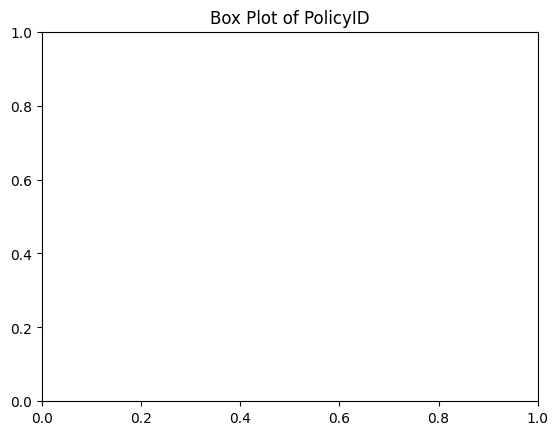

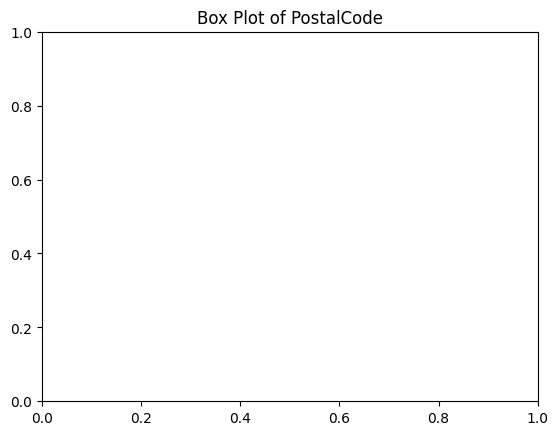

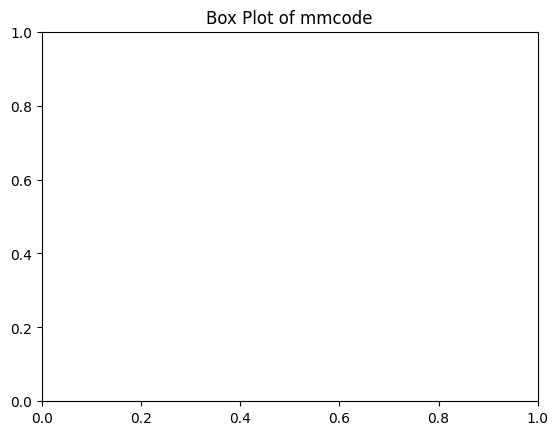

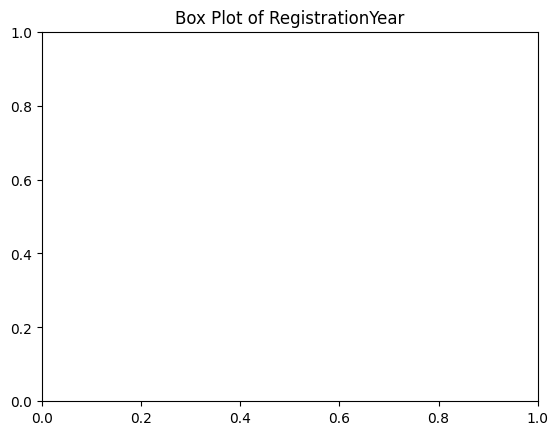

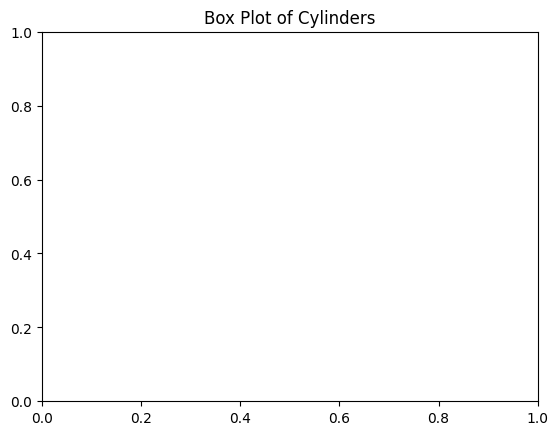

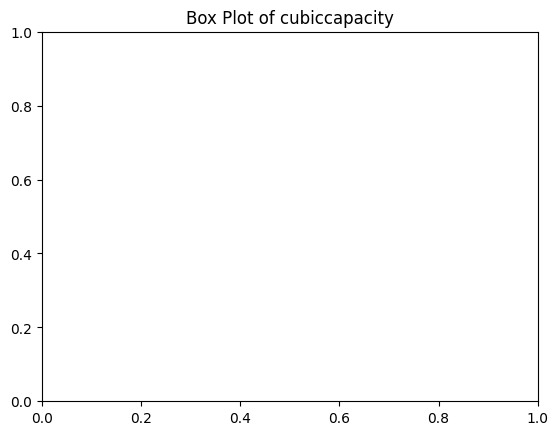

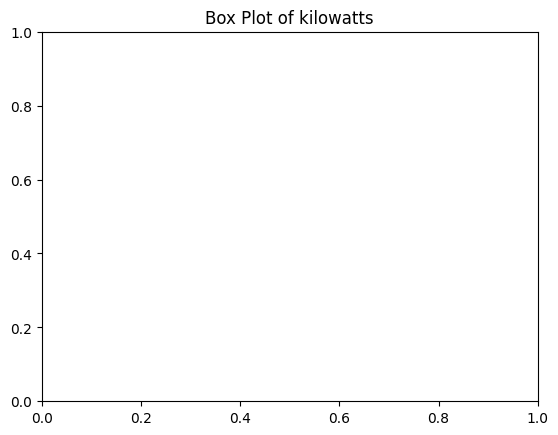

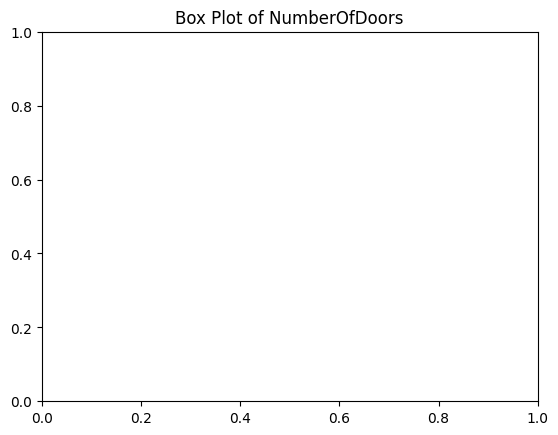

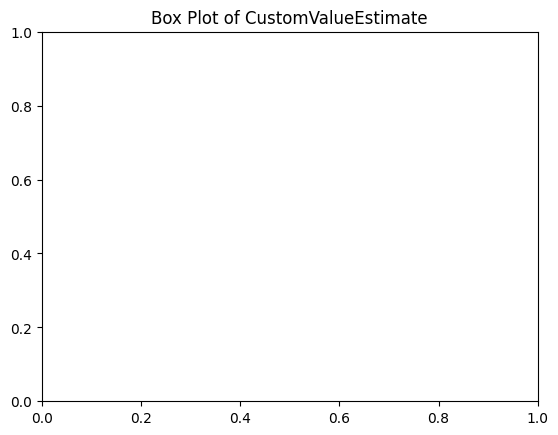

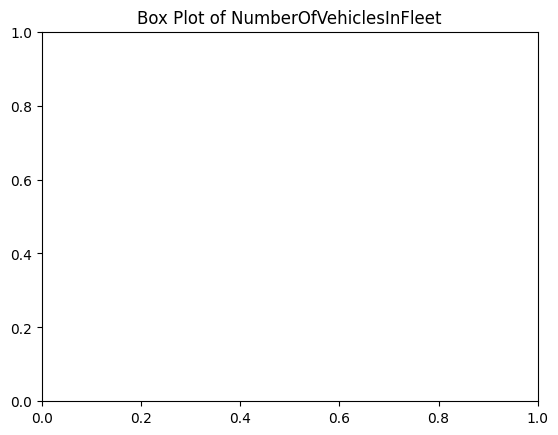

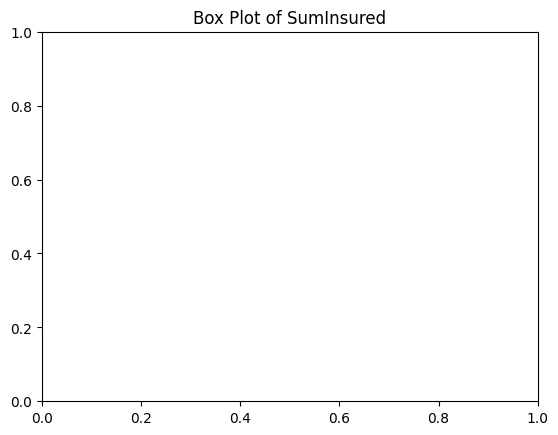

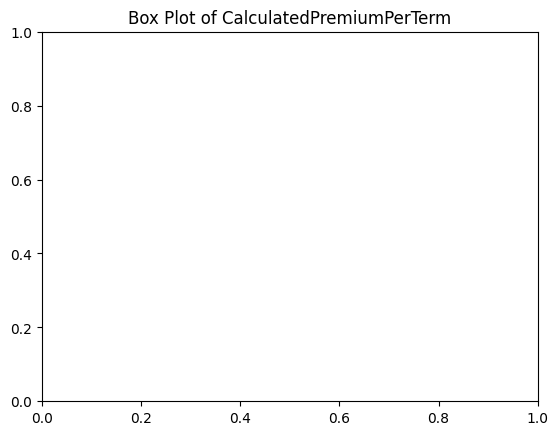

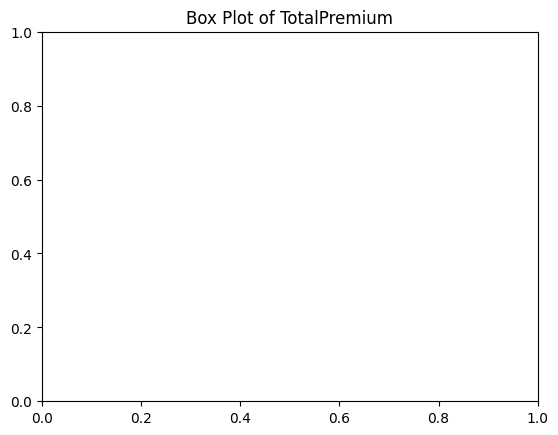

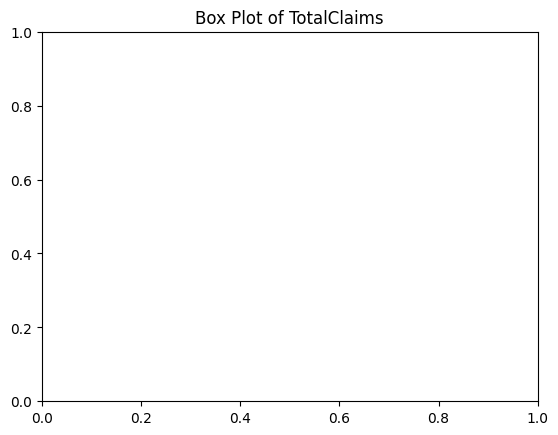

In [75]:
for col in numerical_cols:

    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.savefig(f'screenshots/outlier_for_{col}.png')
    plt.show()

Visualization
    Produce 3 creative and beautiful plots that capture the key insight you gained from your EDA


In [76]:


# 1. Histogram with density plot overlay
sns.histplot(data=df, x='NumericalColumn', kde=True, color='skyblue')
plt.title('Distribution of NumericalColumn')
plt.show()

# 2. Bar plot with error bars
sns.barplot(x='CategoricalColumn', y='NumericalColumn', data=df, palette='viridis', ci='sd')
plt.title('CategoricalColumn vs. NumericalColumn')
plt.show()

# 3. Scatter plot with regression line
sns.regplot(x='NumericalColumn1', y='NumericalColumn2', data=df, color='orange')
plt.title('Relationship between NumericalColumn1 and NumericalColumn2')
plt.show()

ValueError: Could not interpret value `NumericalColumn` for `x`. An entry with this name does not appear in `data`.